# Prepare rules for the all the data sets 
# 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
# 2) Change the minimum length in apriori algorithm
# 3) Visulize the obtained rules using different plots 

In [2]:
# pip install mlxtend

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings        
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Association Rules\book.csv')
data.head(2)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [31]:
data.shape

(2000, 11)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm

## Association Rules with 10% Support and 70% Confidence Value

In [9]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames = True)
frequent_itemsets

# The min_support parameter is specifying the minimum support threshold for an itemset to be considered frequent.
# The use_colnames parameter, when set to True, uses the actual column names in the output.
# min_support=0.1 means that an itemset must appear in at least 10% of the transactions to be considered frequent

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [34]:
frequent_itemsets.head(3)

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)


1. 42 percent of 100 purchases are "ChildBks"
2. 24 percent of 100 purchases are "YouthBks"
3. 43 percent of 100 purchases are "CookBks"

In [35]:
frequent_itemsets.tail(3)

,support,itemsets
36,0.1015,"(DoItYBks, ArtBks, CookBks)"
37,0.1085,"(DoItYBks, CookBks, GeogBks)"
38,0.1035,"(ArtBks, CookBks, GeogBks)"


1. 10 percent of 100 purchases are "ArtBks, DoItYBks and CookBks"
2. 10 percent of 100 purchases are "GeogBks, DoItYBks and CookBks"
3. 10 percent of 100 purchases are "ArtBks, GeogBks and CookBks"

In [7]:
# Association Rules & Info
rules1 = association_rules(frequent_itemsets, metric = 'lift' , min_threshold = 0.7)
rules1

# The lift is a measure of how much more likely item B is bought when item A is bought, compared to when item B is bought
# without item A.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


1. Antecedent support variable tells us probability of antecedent products alone
2. Consequents support variable tells us probability of consequents products alone
3. The support value is the value of the two products (Antecedents and Consequents)
4. Confidence is an indication of how often the rule has been found to be true.
5. The ratio of the observed support to that expected if X and Y were independent.

In [37]:
# filtered_rules = rules1[rules1.lift > 1]
rules1[rules1.lift>1]

# rules1[rules1.lift > 1], you are filtering the association rules to include only those with a lift greater than 1. 
# The lift is a measure that indicates the strength of the association between the antecedent and consequent in a rule.
# A lift greater than 1 implies a positive association, suggesting that the occurrence of the antecedent increases the 
# likelihood of the occurrence of the consequent.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


Filtering the association rules (rules1), specifically where the 'lift' metric is greater than 1

In [38]:
rules1.sort_values('lift',ascending = False)[0:10]
# top_10_rules = rules1.sort_values('lift', ascending=False).head(10)
# print(top_10_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


Sorting the association rules (rules1) based on the 'lift' metric in descending order

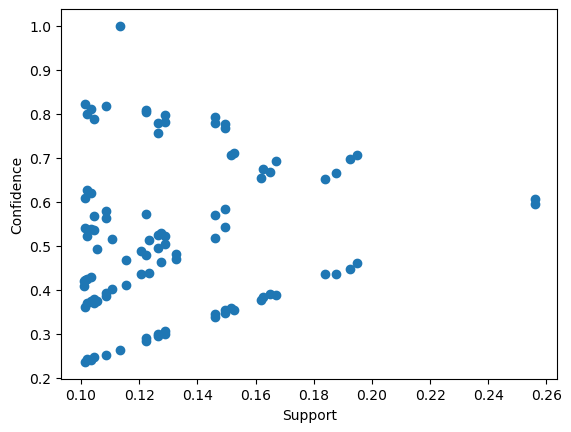

In [39]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

Visualizing the relationship between the 'support' and 'confidence' metrics of the association rules (rules2). 

## Association Rules with 20% Support and 80% COnfidence Value

In [40]:
frequent_itemsets = apriori(data,min_support=0.20,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [41]:
# Association Rules & Info
rules2=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [42]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [43]:
rules2.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


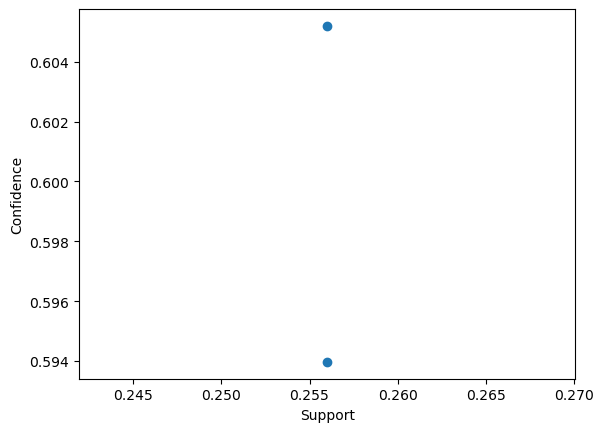

In [44]:
import matplotlib.pyplot as plt
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

## Minimum length in apriori algorithm

In [46]:
# adding a new column 'length'
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

# 1. frequent_itemsets['itemsets'] accesses the 'itemsets' column of the DataFrame, which contains the sets of frequent items.
# 2. apply(lambda x: len(x)) applies a lambda function to each row in the 'itemsets' column. The lambda function calculates the 
#    length (number of items) in each itemset.
# 3. The result is assigned to a new column 'length' in the DataFrame frequent_itemsets.


# Setting the desired minimum length
min_length = 1  

# Filter itemsets based on the minimum length
filtered_itemsets = frequent_itemsets[frequent_itemsets['length'] >= min_length]
filtered_itemsets

new_data['length'] = new_data['itemsets'].apply(lambda x:len(x))
new_data['length'] = new_data['itemsets']. apply(lambda x : len(x))
filtered_data = new_data[new_data]

# Filter rules based on minimum length
# min_len = 2
# filtered_rules = rules[rules.apply(lambda x: len(x['antecedents']) + len(x['consequents']), axis=1) >= min_len]

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [47]:
# Setting the desired minimum length
min_length = 2 

# Filter itemsets based on the minimum length
filtered_itemsets = frequent_itemsets[frequent_itemsets['length'] >= min_length]
filtered_itemsets

,support,itemsets,length
7,0.256,"(ChildBks, CookBks)",2
